In [32]:
import pandas_datareader.data as web
import pandas as pd
import numpy as np
import datetime
from matplotlib import pyplot as plt
from sklearn.preprocessing import Normalizer
from sklearn.impute import SimpleImputer
import yfinance as yf

from sklearn.cluster import KMeans
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.metrics import silhouette_score, silhouette_samples
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

Data Emiten di dalam Indeks SRI-Kehati

In [2]:
companies_ticker = {
    'Aneka Tambang':'ANTM.JK',
    'Astra International':'ASII.JK',
    'Astra Otoparts' : 'AUTO.JK',
    'Bank BCA' :'BBCA.JK',
    'Bank BNI':'BBNI.Jk',
    'Bank BRI':'BBRI.JK',
    'Bank Mandiri':'BMRI.JK',
    'Bank BTN':'BBTN.JK',
    'Dharma Satya':'DSNG.JK',
    'Indofood CBP':'ICBP.JK',
    'Vale Indonesia':'INCO.JK',
    'Indofood' : 'INDF.JK',
    'indocement': 'INTP.JK',
    'Japfa' :'JPFA.JK',
    'Jasa Marga': 'JSMR.JK',
    'Kalbe Farma' :'KLBF.JK',
    'Pembangunan Perumahaan': 'PTPP.JK',
    'Siloam': 'SILO.JK',
    'Semen Indonesia':'SMGR.JK',
    'Timah': 'TINS.JK',
    'Sawit' :'SSMS.JK',
    'Telkom': 'TLKM.JK',
    'United Tractor':'UNTR.JK',
    'Unilever': 'UNVR.JK',
    'Wijaya Karya': 'WIKA.JK',
}
companies = sorted(companies_ticker.items(),key=lambda x:x[1])

companies

[('Aneka Tambang', 'ANTM.JK'),
 ('Astra International', 'ASII.JK'),
 ('Astra Otoparts', 'AUTO.JK'),
 ('Bank BCA', 'BBCA.JK'),
 ('Bank BNI', 'BBNI.Jk'),
 ('Bank BRI', 'BBRI.JK'),
 ('Bank BTN', 'BBTN.JK'),
 ('Bank Mandiri', 'BMRI.JK'),
 ('Dharma Satya', 'DSNG.JK'),
 ('Indofood CBP', 'ICBP.JK'),
 ('Vale Indonesia', 'INCO.JK'),
 ('Indofood', 'INDF.JK'),
 ('indocement', 'INTP.JK'),
 ('Japfa', 'JPFA.JK'),
 ('Jasa Marga', 'JSMR.JK'),
 ('Kalbe Farma', 'KLBF.JK'),
 ('Pembangunan Perumahaan', 'PTPP.JK'),
 ('Siloam', 'SILO.JK'),
 ('Semen Indonesia', 'SMGR.JK'),
 ('Sawit', 'SSMS.JK'),
 ('Timah', 'TINS.JK'),
 ('Telkom', 'TLKM.JK'),
 ('United Tractor', 'UNTR.JK'),
 ('Unilever', 'UNVR.JK'),
 ('Wijaya Karya', 'WIKA.JK')]

Ticker Saham

In [3]:
ticker = {
    'ANTM.JK', 
    'ASII.JK',
    'AUTO.JK', 
    'BBCA.JK',
    'BBNI.Jk',
    'BBRI.JK',
    'BBTN.JK',
    'BMRI.JK',
    'DSNG.JK',
    'ICBP.JK',
    'INCO.JK',
    'INDF.JK',
    'INTP.JK',
    'JPFA.JK',
    'JSMR.JK',
    'KLBF.JK',
    'PTPP.JK',
    'SILO.JK',
    'SMGR.JK',
    'SSMS.Jk',
    'TINS.JK',
    'TLKM.JK',
    'UNTR.JK',
    'UNVR.JK',
    'WIKA.JK'
}

Download DataSet

In [4]:

start_date = '2018-12-18'
end_date = '2023-12-15'
stock_data = yf.download(ticker, start=start_date, end=end_date)

[*********************100%%**********************]  25 of 25 completed


In [5]:
stock_data

Adj Close                                                      \
                ANTM.JK      ASII.JK      AUTO.JK      BBCA.JK      BBNI.JK   
Date                                                                          
2018-12-18   689.500427  6622.891113  1222.917114  4613.575195  3818.570557   
2018-12-19   698.693848  6662.431641  1226.913330  4763.870605  3851.775635   
2018-12-20   703.290527  6701.969727  1226.913330  4659.119629  3840.707520   
2018-12-21   707.887207  6662.431641  1222.917114  4709.216797  3840.707520   
2018-12-24   707.887207  6662.431641  1222.917114  4709.216797  3840.707520   
...                 ...          ...          ...          ...          ...   
2023-12-08  1685.000000  5675.000000  2500.000000  8750.000000  5075.000000   
2023-12-11  1655.000000  5600.000000  2410.000000  8750.000000  5175.000000   
2023-12-12  1625.000000  5575.000000  2360.000000  8700.000000  5275.000000   
2023-12-13  1595.000000  5525.000000  2330.000000  8675.000000  5175.000000   
2023-12-14  1640.000000  5625.000000  2360.000000  9050.000000  5350.000000   

                                                                             \
                BBRI.JK      BBTN.JK      BMRI.JK     DSNG.JK       ICBP.JK   
Date                                                                          
2018-12-18  2670.810303  2157.513672  2975.896973  303.472565   9060.996094   
2018-12-19  2700.240723  2198.845459  3006.263184  301.758026   9196.236328   
2018-12-20  2685.525635  2149.247314  2955.652588  303.472565   9444.173828   
2018-12-21  2663.452881  2132.714600  2925.286133  305.187073   9489.252930   
2018-12-24  2663.452881  2132.714600  2925.286133  305.187073   9489.252930   
...                 ...          ...          ...         ...           ...   
2023-12-08  5296.135254  1220.000000  5700.000000  550.000000  10975.000000   
2023-12-11  5222.235840  1210.000000  5775.000000  545.000000  10525.000000   
2023-12-12  5246.868652  1205.000000  5800.000000  545.000000  10625.000000   
2023-12-13  5222.235840  1195.000000  5725.000000  535.000000  10550.000000   
2023-12-14  5468.567383  1225.000000  5950.000000  530.000000  10575.000000   

            ...    Volume                                              \
            ...   KLBF.JK      PTPP.JK   SILO.JK  SMGR.JK     SSMS.JK   
Date        ...                                                         
2018-12-18  ...  25780200   23472400.0   1456000  3195967  71804200.0   
2018-12-19  ...  45512300   20787300.0  20900800  5419436  72424100.0   
2018-12-20  ...  31011500   16104500.0  22442400  4202860  81691100.0   
2018-12-21  ...  31783000   11310200.0   8909600  5701719  72685300.0   
2018-12-24  ...         0          0.0         0        0         0.0   
...         ...       ...          ...       ...      ...         ...   
2023-12-08  ...  21423900   17828600.0   2924400  2601700   8619200.0   
2023-12-11  ...  24836400   33611000.0   2844000  8210100  10219900.0   
2023-12-12  ...  13677300   11680400.0   3661800  3726500   8760100.0   
2023-12-13  ...  58989200   23178900.0   1941500  2625800  10050000.0   
2023-12-14  ...  42641800  117445200.0   4817600  3743900  10787000.0   

                                                                       
               TINS.JK      TLKM.JK    UNTR.JK   UNVR.JK      WIKA.JK  
Date                                                                   
2018-12-18  12075600.0   79833100.0  4702100.0   7689000   23709100.0  
2018-12-19   4234100.0   81542500.0  7848000.0  14906000   28416400.0  
2018-12-20   7297800.0  100129200.0  2936200.0   8704500   16127700.0  
2018-12-21  13662000.0  114752300.0  9103000.0  17106000   12278200.0  
2018-12-24         0.0          0.0        0.0         0          0.0  
...                ...          ...        ...       ...          ...  
2023-12-08   7828900.0   61476300.0  6433900.0  10274300   32277500.0  
2023-12-11   8580100.0   99365500.0  3168200.0   7700700 

In [6]:
stock_data.shape

(1233, 150)

Penamaan

In [10]:
harga_tutup = stock_data['Close']
harga_buka= stock_data['Open']

print(harga_tutup.iloc[0])

ANTM.JK      750.000000
ASII.JK     8375.000000
AUTO.JK     1530.000000
BBCA.JK     5065.000000
BBNI.JK     4312.500000
BBRI.JK     3299.943115
BBTN.JK     2318.732178
BMRI.JK     3675.000000
DSNG.JK      354.000000
ICBP.JK    10050.000000
INCO.JK     3040.000000
INDF.JK     7075.000000
INTP.JK    19025.000000
JPFA.JK     2120.000000
JSMR.JK     4400.000000
KLBF.JK     1460.000000
PTPP.JK     1960.000000
SILO.JK      431.250000
SMGR.JK    11343.440430
SSMS.JK     1220.000000
TINS.JK      750.000000
TLKM.JK     3740.000000
UNTR.JK    29125.000000
UNVR.JK     8790.000000
WIKA.JK     1715.000000
Name: 2018-12-18 00:00:00, dtype: float64


In [11]:
print(harga_buka.iloc[0])

ANTM.JK      730.000000
ASII.JK     8200.000000
AUTO.JK     1550.000000
BBCA.JK     5100.000000
BBNI.JK     4275.000000
BBRI.JK     3227.217041
BBTN.JK     2265.427979
BMRI.JK     3625.000000
DSNG.JK      356.000000
ICBP.JK    10050.000000
INCO.JK     3000.000000
INDF.JK     6975.000000
INTP.JK    19350.000000
JPFA.JK     2060.000000
JSMR.JK     4300.000000
KLBF.JK     1475.000000
PTPP.JK     1950.000000
SILO.JK      443.750000
SMGR.JK    11168.925781
SSMS.JK     1250.000000
TINS.JK      740.000000
TLKM.JK     3700.000000
UNTR.JK    28550.000000
UNVR.JK     8700.000000
WIKA.JK     1650.000000
Name: 2018-12-18 00:00:00, dtype: float64


Pre-processing

In [7]:
print("Are there any 'MISSING VALUES / NULL / NaN' in the Dataset?\nAnswer:", stock_data.isnull().sum().values.any())

Are there any 'MISSING VALUES / NULL / NaN' in the Dataset?
Answer: True


In [8]:
print(stock_data.isnull().sum())

Adj Close  ANTM.JK    0
           ASII.JK    1
           AUTO.JK    1
           BBCA.JK    0
           BBNI.JK    0
                     ..
Volume     TINS.JK    1
           TLKM.JK    1
           UNTR.JK    1
           UNVR.JK    0
           WIKA.JK    1
Length: 150, dtype: int64


In [9]:
stock_data = stock_data.dropna()

In [18]:
stock_data

Adj Close                                                      \
                ANTM.JK      ASII.JK      AUTO.JK      BBCA.JK      BBNI.JK   
Date                                                                          
2018-12-18   689.500488  6622.892090  1222.916992  4613.576172  3818.570068   
2018-12-19   698.693848  6662.430664  1226.913452  4763.869629  3851.775635   
2018-12-20   703.290527  6701.970703  1226.913452  4659.119629  3840.707275   
2018-12-21   707.887085  6662.430664  1222.916992  4709.217285  3840.707275   
2018-12-24   707.887085  6662.430664  1222.916992  4709.217285  3840.707275   
...                 ...          ...          ...          ...          ...   
2023-12-08  1685.000000  5675.000000  2500.000000  8750.000000  5075.000000   
2023-12-11  1655.000000  5600.000000  2410.000000  8750.000000  5175.000000   
2023-12-12  1625.000000  5575.000000  2360.000000  8700.000000  5275.000000   
2023-12-13  1595.000000  5525.000000  2330.000000  8675.000000  5175.000000   
2023-12-14  1640.000000  5625.000000  2360.000000  9050.000000  5350.000000   

                                                                             \
                BBRI.JK      BBTN.JK      BMRI.JK     DSNG.JK       ICBP.JK   
Date                                                                          
2018-12-18  2670.810303  2157.513672  2975.896973  303.472565   9060.997070   
2018-12-19  2700.240723  2198.845703  3006.263184  301.758026   9196.236328   
2018-12-20  2685.525391  2149.247314  2955.652588  303.472565   9444.172852   
2018-12-21  2663.452637  2132.714600  2925.286377  305.187103   9489.252930   
2018-12-24  2663.452637  2132.714600  2925.286377  305.187103   9489.252930   
...                 ...          ...          ...         ...           ...   
2023-12-08  5296.135254  1220.000000  5700.000000  550.000000  10975.000000   
2023-12-11  5222.235840  1210.000000  5775.000000  545.000000  10525.000000   
2023-12-12  5246.868652  1205.000000  5800.000000  545.000000  10625.000000   
2023-12-13  5222.235840  1195.000000  5725.000000  535.000000  10550.000000   
2023-12-14  5468.567383  1225.000000  5950.000000  530.000000  10575.000000   

            ...    Volume                                              \
            ...   KLBF.JK      PTPP.JK   SILO.JK  SMGR.JK     SSMS.JK   
Date        ...                                                         
2018-12-18  ...  25780200   23472400.0   1456000  3195967  71804200.0   
2018-12-19  ...  45512300   20787300.0  20900800  5419436  72424100.0   
2018-12-20  ...  31011500   16104500.0  22442400  4202860  81691100.0   
2018-12-21  ...  31783000   11310200.0   8909600  5701719  72685300.0   
2018-12-24  ...         0          0.0         0        0         0.0   
...         ...       ...          ...       ...      ...         ...   
2023-12-08  ...  21423900   17828600.0   2924400  2601700   8619200.0   
2023-12-11  ...  24836400   33611000.0   2844000  8210100  10219900.0   
2023-12-12  ...  13677300   11680400.0   3661800  3726500   8760100.0   
2023-12-13  ...  58989200   23178900.0   1941500  2625800  10050000.0   
2023-12-14  ...  42641800  117445200.0   4817600  3743900  10787000.0   

                                                                       
               TINS.JK      TLKM.JK    UNTR.JK   UNVR.JK      WIKA.JK  
Date                                                                   
2018-12-18  12075600.0   79833100.0  4702100.0   7689000   23709100.0  
2018-12-19   4234100.0   81542500.0  7848000.0  14906000   28416400.0  
2018-12-20   7297800.0  100129200.0  2936200.0   8704500   16127700.0  
2018-12-21  13662000.0  114752300.0  9103000.0  17106000   12278200.0  
2018-12-24         0.0          0.0        0.0         0          0.0  
...                ...          ...        ...       ...          ...  
2023-12-08   7828900.0   61476300.0  6433900.0  10274300   32277500.0  
2023-12-11   8580100.0   99365500.0  3168200.0   7700700 

In [12]:
harga_tutup = np.array(harga_tutup).T
harga_buka = np.array(harga_buka).T

harga_tutup.shape 

(25, 1232)

In [13]:
row,col = harga_tutup.shape

movements = np.zeros([row,col])

for i in range(0,row):
    movements[i,:]=np.subtract(harga_tutup[i,:], harga_buka[i,:])
    movements[i,:]=np.true_divide(movements[i,:],harga_buka[i,:])

print('Perusahaan:{},Perubahannya:{}'.format(companies[1][1],movements[1][1]))

Perusahaan:ASII.JK,Perubahannya:0.008982035928143712


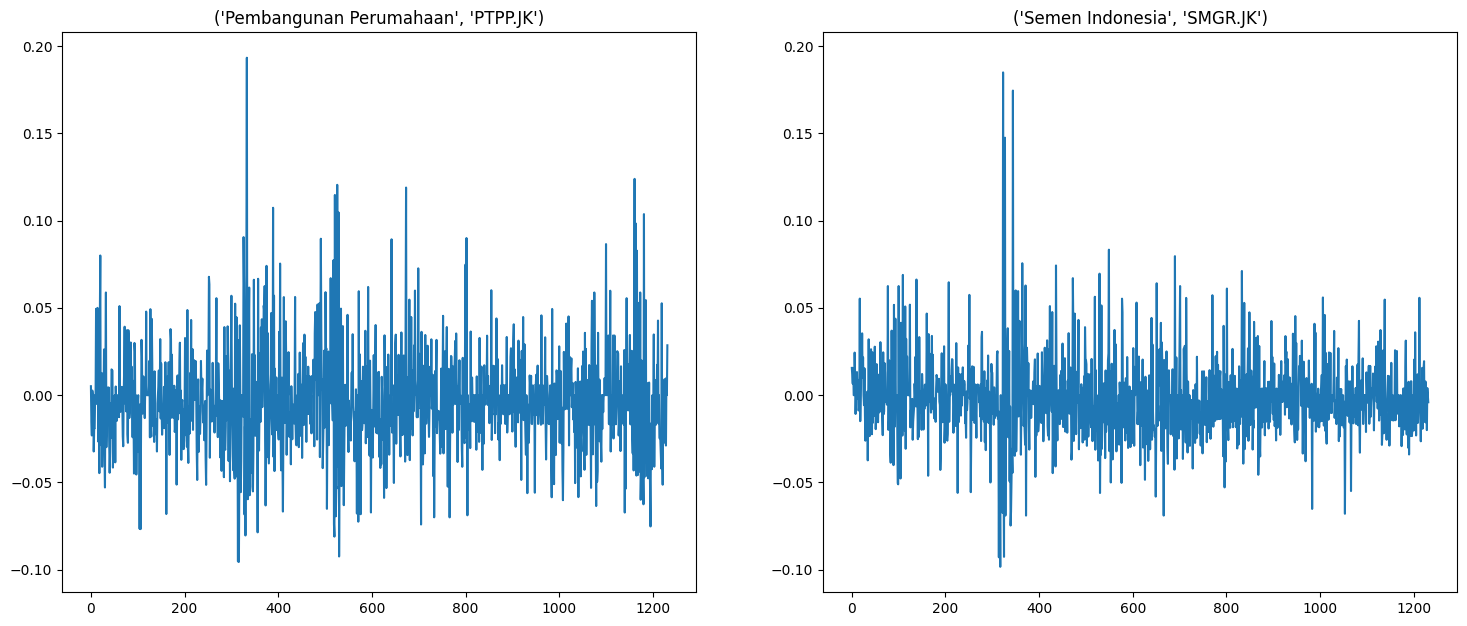

In [14]:
plt.figure(figsize=(18,16))
ax1 = plt.subplot(221)
plt.plot(movements[16][:])
plt.title(companies[16])

plt.subplot(222,sharey=ax1)
plt.plot(movements[18][:])
plt.title(companies[18])
plt.show()

In [15]:
normalizer = Normalizer()

new = normalizer.fit_transform(movements)

print(new.max())
print(new.min())
print(new.mean())

0.28012073110334423
-0.17512659845337042
-0.0016463612041610037


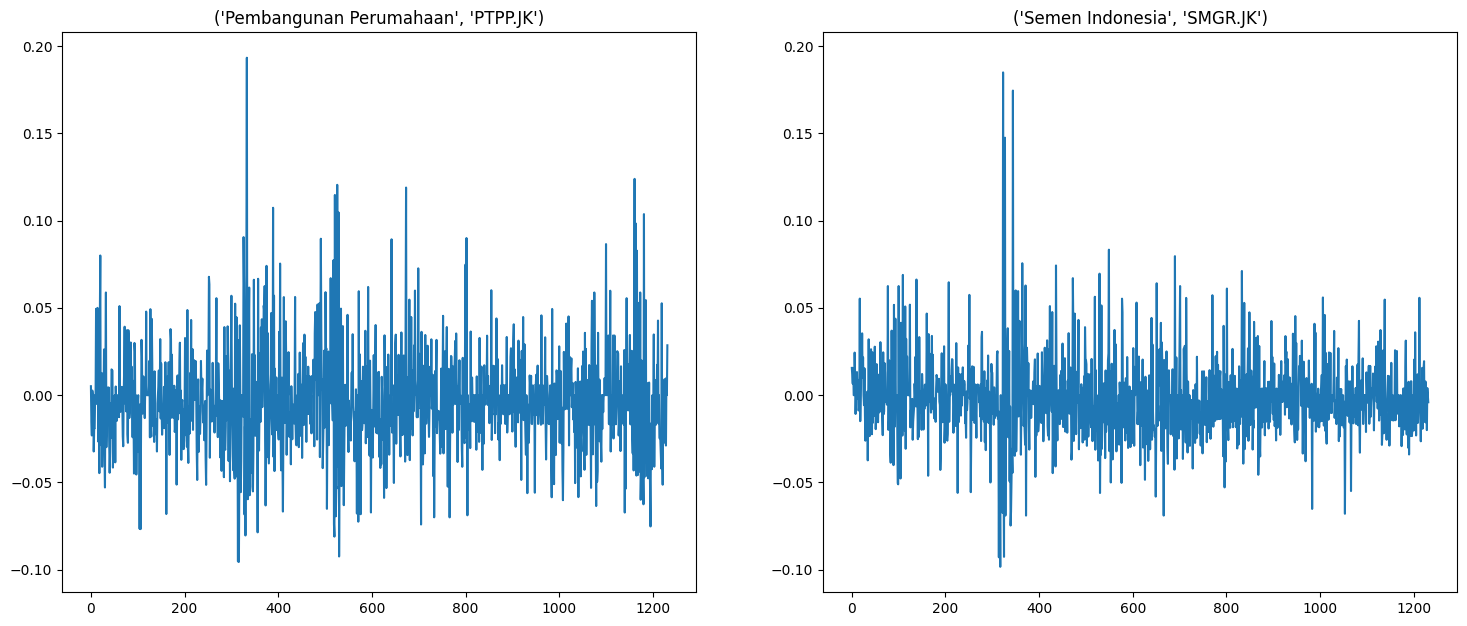

In [16]:
plt.figure(figsize=(18,16))
ax1 = plt.subplot(221)
plt.plot(movements[16][:])
plt.title(companies[16])

plt.subplot(222,sharey=ax1)
plt.plot(movements[18][:])
plt.title(companies[18])
plt.show()

In [17]:
normalizer = Normalizer()
kmeans = KMeans(n_clusters=3,max_iter=100)

pipeline = make_pipeline(normalizer,kmeans)

In [18]:
pipeline.fit(movements)

C:\Users\yolau\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Pipeline(steps=[('normalizer', Normalizer()),
                ('kmeans', KMeans(max_iter=100, n_clusters=3))])

In [19]:
print(kmeans.inertia_)

15.542606060345


In [20]:
labels = pipeline.predict(movements)
df = pd.DataFrame({'labels':labels,'perusahaan':companies})

print(df.sort_values('labels'))

    labels                         perusahaan
2        0          (Astra Otoparts, AUTO.JK)
19       0                   (Sawit, SSMS.JK)
17       0                  (Siloam, SILO.JK)
8        0            (Dharma Satya, DSNG.JK)
9        1            (Indofood CBP, ICBP.JK)
11       1                (Indofood, INDF.JK)
23       1                (Unilever, UNVR.JK)
15       1             (Kalbe Farma, KLBF.JK)
0        2           (Aneka Tambang, ANTM.JK)
22       2          (United Tractor, UNTR.JK)
21       2                  (Telkom, TLKM.JK)
20       2                   (Timah, TINS.JK)
18       2         (Semen Indonesia, SMGR.JK)
16       2  (Pembangunan Perumahaan, PTPP.JK)
12       2              (indocement, INTP.JK)
13       2                   (Japfa, JPFA.JK)
10       2          (Vale Indonesia, INCO.JK)
7        2            (Bank Mandiri, BMRI.JK)
6        2                (Bank BTN, BBTN.JK)
5        2                (Bank BRI, BBRI.JK)
4        2                (Bank BN

In [22]:
new

array([[ 0.02649925,  0.00640545,  0.01281089, ..., -0.01753274,
        -0.01785642,  0.00892821],
       [ 0.03211611,  0.01351679,  0.02711476, ..., -0.02651752,
        -0.00677869,  0.00671817],
       [-0.01795983, -0.00451911,  0.        , ..., -0.02887732,
        -0.01769348,  0.01792129],
       ...,
       [ 0.02594977, -0.02858364,  0.00787019, ..., -0.00878497,
        -0.04601652,  0.02292638],
       [ 0.0152658 ,  0.03697638,  0.02487124, ..., -0.02951387,
         0.00860463, -0.02138686],
       [ 0.03516227,  0.00260228, -0.00780683, ..., -0.07731014,
        -0.1358275 ,  0.25030042]])

In [23]:
from sklearn.decomposition import PCA 

reduced_data = PCA(n_components=2).fit_transform(new)

kmeans = KMeans(n_clusters=3)
kmeans.fit(reduced_data)
labels = kmeans.predict(reduced_data)

df = pd.DataFrame({'labels':labels,'perusahaan':companies})

print(df.sort_values('labels'))

    labels                         perusahaan
0        0           (Aneka Tambang, ANTM.JK)
20       0                   (Timah, TINS.JK)
16       0  (Pembangunan Perumahaan, PTPP.JK)
10       0          (Vale Indonesia, INCO.JK)
24       0            (Wijaya Karya, WIKA.JK)
22       1          (United Tractor, UNTR.JK)
8        1            (Dharma Satya, DSNG.JK)
9        1            (Indofood CBP, ICBP.JK)
11       1                (Indofood, INDF.JK)
23       1                (Unilever, UNVR.JK)
13       1                   (Japfa, JPFA.JK)
19       1                   (Sawit, SSMS.JK)
15       1             (Kalbe Farma, KLBF.JK)
2        1          (Astra Otoparts, AUTO.JK)
17       1                  (Siloam, SILO.JK)
5        2                (Bank BRI, BBRI.JK)
21       2                  (Telkom, TLKM.JK)
1        2     (Astra International, ASII.JK)
14       2              (Jasa Marga, JSMR.JK)
4        2                (Bank BNI, BBNI.Jk)
3        2                (Bank BC

C:\Users\yolau\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [24]:
print(kmeans.inertia_)

1.1943817284019553


Mencari Jarak antar data poin ke titik centroid setiap cluster

In [25]:
# JumlahCluster
k = 3

# Initialisasi model kmeans
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(new)

# cluster labels dan cluster centers
labels = kmeans.labels_
centers = kmeans.cluster_centers_

# Mwnghirung jarak dari setiap data poin titik poin 
distances = np.zeros((len(new), k))
for i in range(len(new)):
    for j in range(k):
        distances[i, j] = np.linalg.norm(new[i] - centers[j])


for i in range(len(new)):
    print(f"Data point {i+1}: Distances to Cluster Centers - {distances[i]}")


distances_df = pd.DataFrame(distances, columns=[f"Cluster_{j+1}" for j in range(k)])
distances_df.index.name = 'Data Point'
print(distances_df)

Data point 1: Distances to Cluster Centers - [0.98391118 0.6482318  0.92424195]
Data point 2: Distances to Cluster Centers - [0.80371023 0.9801614  0.86746511]
Data point 3: Distances to Cluster Centers - [0.99452062 1.02442459 0.88309266]
Data point 4: Distances to Cluster Centers - [0.78788423 1.0238174  0.8806997 ]
Data point 5: Distances to Cluster Centers - [0.83472908 0.95506504 0.65414932]
Data point 6: Distances to Cluster Centers - [0.84866308 0.9966917  0.71318461]
Data point 7: Distances to Cluster Centers - [0.93741097 0.9721927  0.69700039]
Data point 8: Distances to Cluster Centers - [0.8427387  0.98904036 0.70180624]
Data point 9: Distances to Cluster Centers - [1.11240824 0.91038796 1.11150663]
Data point 10: Distances to Cluster Centers - [0.79355154 1.07667484 0.99327779]
Data point 11: Distances to Cluster Centers - [0.99291235 0.69383172 0.97383913]
Data point 12: Distances to Cluster Centers - [0.76508477 1.03408823 0.9635932 ]
Data point 13: Distances to Cluster C

C:\Users\yolau\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Mencari jarak antar Centroid Cluster

In [26]:

k = 3
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(new)

centers = kmeans.cluster_centers_


centroid_distances = np.zeros((k, k))
for i in range(k):
    for j in range(k):
        centroid_distances[i, j] = np.linalg.norm(centers[i] - centers[j])


for i in range(k):
    for j in range(k):
        print(f"Distance between Centroid {i+1} and Centroid {j+1}: {centroid_distances[i, j]}")


centroid_distances_df = pd.DataFrame(centroid_distances, columns=[f"Centroid_{j+1}" for j in range(k)])
centroid_distances_df.index.name = 'Centroid'
print(centroid_distances_df)

Distance between Centroid 1 and Centroid 1: 0.0
Distance between Centroid 1 and Centroid 2: 0.655266907250514
Distance between Centroid 1 and Centroid 3: 0.5280921379530226
Distance between Centroid 2 and Centroid 1: 0.655266907250514
Distance between Centroid 2 and Centroid 2: 0.0
Distance between Centroid 2 and Centroid 3: 0.6294305159281298
Distance between Centroid 3 and Centroid 1: 0.5280921379530226
Distance between Centroid 3 and Centroid 2: 0.6294305159281298
Distance between Centroid 3 and Centroid 3: 0.0
          Centroid_1  Centroid_2  Centroid_3
Centroid                                    
0           0.000000    0.655267    0.528092
1           0.655267    0.000000    0.629431
2           0.528092    0.629431    0.000000


C:\Users\yolau\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Jarak dari masing masing centroid ke titik global cluster

In [27]:
k = 3

kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(new)

centers = kmeans.cluster_centers_
global_centroid = np.mean(new, axis=0)

centroid_to_global_distances = np.zeros(k)
for i in range(k):
    centroid_to_global_distances[i] = np.linalg.norm(centers[i] - global_centroid)


for i in range(k):
    print(f"Distance from Centroid {i+1} to Global Centroid: {centroid_to_global_distances[i]}")


centroid_distances_df = pd.DataFrame(centroid_to_global_distances, columns=['Distance to Global Centroid'])
centroid_distances_df.index.name = 'Centroid'
print(centroid_distances_df)

Distance from Centroid 1 to Global Centroid: 0.29637498218962344
Distance from Centroid 2 to Global Centroid: 0.445832495207423
Distance from Centroid 3 to Global Centroid: 0.30170733406589056
          Distance to Global Centroid
Centroid                             
0                            0.296375
1                            0.445832
2                            0.301707


C:\Users\yolau\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Silhouette Score

C:\Users\yolau\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\yolau\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\yolau\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set

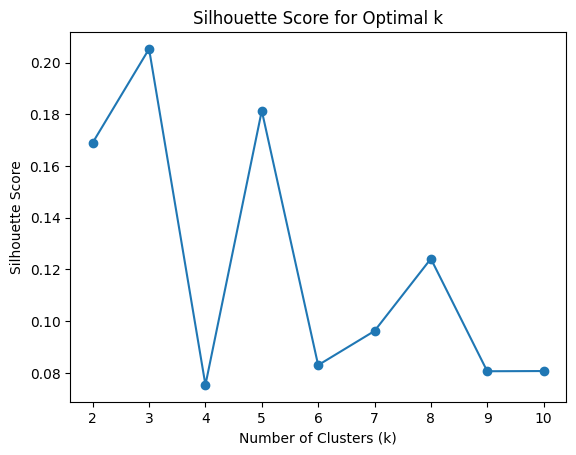

In [37]:
def get_kmeans_silhouette_score(data, n_clusters):
    pipeline = make_pipeline(StandardScaler(), KMeans(n_clusters=n_clusters, random_state=42))
    labels = pipeline.fit_predict(data)
    silhouette_avg = silhouette_score(data, labels)
    return silhouette_avg

# Specify the range of clusters 
k_values = range(2, 11)  

# Calculate Silhouette Score for each value of k
silhouette_scores = [get_kmeans_silhouette_score(movements, k) for k in k_values]

# Plot Silhouette Score
plt.plot(k_values, silhouette_scores, '-o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for Optimal k')
plt.show()

In [38]:
silhouette_scores

[0.16901253077093106,
 0.20526104762840064,
 0.07533004401196719,
 0.18137239202161592,
 0.08297908030202883,
 0.09618999198389883,
 0.12412474016652265,
 0.08061889505202371,
 0.08069667024690673]

C:\Users\yolau\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\yolau\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\yolau\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set

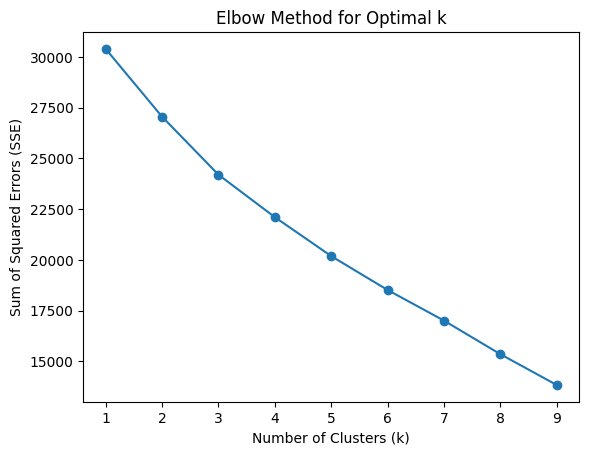

In [36]:

pipeline = make_pipeline(StandardScaler(), KMeans())


ks = range(1, 10)  

sse = []
for k in ks:
    pipeline.named_steps['kmeans'].set_params(n_clusters=k)
    pipeline.fit(movements)
    sse.append(pipeline.named_steps['kmeans'].inertia_)


plt.plot(ks, sse, '-o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Sum of Squared Errors (SSE)')
plt.title('Elbow Method for Optimal k')
plt.show()

In [ ]:
h=0.01

x_min,x_max = reduced_data[:,0].min()-1,reduced_data[:,0].max()+1
y_min,y_max = reduced_data[:,1].min()-1,reduced_data[:,1].max()+1

xx,yy = np.meshgrid(np.arange(x_min,x_max, h),np.arange(y_min,y_max, h))

Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])

Z = Z.reshape(xx.shape)

cmap = plt.cm.Paired

plt.clf()
plt.figure(figsize=(10, 10))
plt.imshow(Z,interpolation='nearest',extent=(xx.min(),xx.max(),yy.min(),yy.max()),cmap=cmap, aspect='auto',origin='lower')

centroids = kmeans.cluster_centers_
plt.scatter(centroids[:,0],centroids[:,1],marker='x',s=169,linewidth=3,color='w',zorder=3)

plt.title('Cluster data Pasar Saham menggunakan Algoritma K-Means pada Perubahan Data (PCA - reduced data)')
plt.xlim(x_min,x_max)
plt.ylim(y_min,y_max)
plt.show()